<a href="https://colab.research.google.com/github/rianteam22/Tweet_Spacy_classifier/blob/main/Tweet_Spacy_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação e instalação das bibliotecas

In [ ]:
import spacy
spacy.__version__

'3.6.1'

In [3]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!python -m spacy download pt_core_news_sm

2023-09-13 17:22:18.632863: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


# Carregamento da base de dados

In [4]:
base_dados = pd.read_csv('/content/drive/MyDrive/Cópia de Train50.csv', delimiter = ';')
base_teste = pd.read_csv('/content/drive/MyDrive/Cópia de Test.csv', delimiter = ';')

In [5]:
base_dados

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)
...,...,...,...,...,...
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(base_dados, *['sentiment'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(base_dados, *['sentiment'], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [6]:
base_teste

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)
...,...,...,...,...,...
4995,1030528364145201153,@ol_cdanilo parece livro de autoajuda :(,Fri Aug 17 18:54:42 +0000 2018,0,:(
4996,1030528418235015168,@tatazoquita aaaaa sinto muito :((,Fri Aug 17 18:54:55 +0000 2018,0,:(
4997,1030528446122930176,To começando a sentir dor de novo e meu irmão ...,Fri Aug 17 18:55:02 +0000 2018,0,:(
4998,1030528453752352769,@ichbintw parece que no dia que toma a vacina ...,Fri Aug 17 18:55:04 +0000 2018,0,:(


In [7]:
base_dados.drop(['id','tweet_date', 'query_used'], axis = 1, inplace = True)

In [8]:
base_teste.drop(['id','tweet_date', 'query_used'], axis = 1, inplace = True)

# Função para pré-processamento dos textos

In [9]:
pontuacoes = string.punctuation

In [10]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [13]:
pln = spacy.load('pt_core_news_sm')

In [14]:
def preprocessamento(texto):
  texto = texto.lower()
  texto = re.sub(r'@[A-Za-z0-9$-_@.&+]+', ' ', texto)
  texto = re.sub(r'https?://[A-Za-z0-9./]+', ' ', texto)
  texto = re.sub(r' +', ' ', texto)

  documento = pln(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

# Pré-processamento da base de dados

### Limpeza dos textos

In [16]:
base_dados['tweet_text'] = base_dados['tweet_text'].apply(preprocessamento)

In [17]:
base_teste['tweet_text'] = base_teste['tweet_text'].apply(preprocessamento)

In [18]:
base_dados

,tweet_text,sentiment
0,pessoa certo vale azevedo :),1
1,precisamente contrário :) vir chuva vir disp...,1
2,video hoje ... pensar falar meta de o csgo pag...,1
3,Aaaaaaaa amei polaroids expressar to apaixonar...,1
4,valorizar coração de o menininho vc diferente ...,1
...,...,...
49995,:( lir dói,0
49996,.. problema c/ .. de o toc :((( em o entanto...,0
49997,amo minja vidinha precioso desculpa péssima ut...,0
49998,pfvor :(,0


In [19]:
base_teste

,tweet_text,sentiment
0,:),1
1,pa puta parir :),1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 confiro em o...,1
3,vcs ajudar galera por o amor butera :) mmvo ih...,1
4,casa de o zé morrer sono chegar casa fico sono...,1
...,...,...
4995,parecer livro Autoajuda :(,0
4996,aaaaar sinto :((,0
4997,to começar sentir dor irmão sumir remédio :(,0
4998,parecer em o dia tomar vacina n beber :(,0


### Tratamento da classe

In [20]:
base_dados_final = []
for tweet_text, sentiment in zip(base_dados['tweet_text'], base_dados['sentiment']):
  if sentiment == 1:
    dic = ({'FELIZ': True, 'TRISTE': False})
  elif sentiment == 0:
    dic = ({'FELIZ': False, 'TRISTE': True})

  base_dados_final.append([tweet_text, dic.copy()])

# Criação do classificador

In [21]:
from spacy.training import Example

In [22]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("FELIZ")
textcat.add_label("TRISTE")
historico = []

In [23]:
modelo.begin_training()
for epoca in range(10):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 1 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.7001382467214299}
{'textcat': 0.08110014707240062}
{'textcat': 0.02449279560997739}
{'textcat': 0.011209397504075527}
{'textcat': 0.0019414190736254013}
{'textcat': 5.995618967034568e-06}
{'textcat': 5.0761636948416615e-09}
{'textcat': 2.114843492447276e-09}
{'textcat': 1.454821351261408e-09}
{'textcat': 1.1421616436245756e-09}


In [24]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [25]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.70013825e+00, 8.11001471e-02, 2.44927956e-02, 1.12093975e-02,
       1.94141907e-03, 5.99561897e-06, 5.07616369e-09, 2.11484349e-09,
       1.45482135e-09, 1.14216164e-09])

Text(0, 0.5, 'Erro')

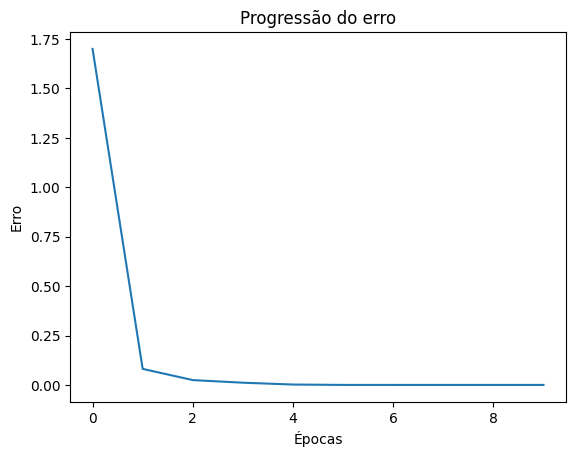

In [26]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [27]:
modelo.to_disk("modelo")

In [28]:
# Load the pre-trained model
modelo_carregado = spacy.load("/content/modelo")

# Avaliação do modelo

## Avaliação na base de teste


In [29]:
previsoes = []
for texto in base_teste['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes

In [31]:
previsoes_final = []
for previsao in previsoes:
  if previsao['FELIZ'] > previsao['TRISTE']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [32]:
previsoes_final

array([1, 1, 1, ..., 0, 0, 0])

In [33]:
respostas_reais = base_teste['sentiment'].values
respostas_reais

array([1, 1, 1, ..., 0, 0, 0])

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final) * 100

99.82

In [35]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[2496,    4],
       [   5, 2495]])